# Q2: 
In Matlab or python, implement the mean shift clustering algorithm as discussed in lectures and papers.  To do this, use a “flat” kernel function (you will need to specify the value for the radius parameter, λ). You can choose to implement as either a “blurring” or “non-blurring” process. 

1. Set some initial points

2. use kernel to calculate and shift the mean to the modes

4. continue until convergence

In [1]:
import numpy as np
from nu

In [13]:
a = np.random.randn(200,2)

In [18]:
b = a + 4 
c = np.copy(a)
c[:,1] = 3*c[:,1]
c -= 4
d = np.vstack((a,b))
e = np.vstack((a,b,c))

In [19]:
import seaborn as sns

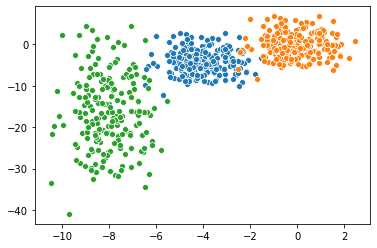

In [20]:
sns.scatterplot(a[:,0],a[:,1])
sns.scatterplot(b[:,0],b[:,1])
sns.scatterplot(c[:,0],c[:,1])

Assume data is in the form \[num_samples, feature dims\]

e.g many x, y data points \[num_points, 2\]

In [88]:
class MeanShift:
    def __init__(self, kernel, num_init_points=None,\
                 blurring=False, threshold=0.01):
        self._kernel = kernel
        self._init_points = num_init_points
        self._blurring = blurring
        self._threshold = threshold
        self._trajectories = []
    
    def fit(self, data):
        assert len(data.shape) == 2
        if self._init_points is None:
            cluster_centres = data
        else:
            idx = np.random.randint(0,data.shape[0],self._init_points)
            cluster_centres = data[idx,:]
        while 1:
            old_centres = np.copy(cluster_centres)
            for i in range(cluster_centres.shape[0]):
                sum_num = 0
                sum_dem = 0
                for j in range(data.shape[0]):
                    kernel_val = self._kernel(cluster_centres[i,:],\
                                           data[j,:])
                    sum_num += kernel_val*data[j,:]
                    sum_dem += kernel_val
                if sum_dem != 0:
                    cluster_centres[i,:] = sum_num/sum_dem
            if (np.linalg.norm(cluster_centres-old_centres,axis=0) \
                < self._threshold).all():
                return cluster_centres
    def fit_fast(self, data):
        assert len(data.shape) == 2
        if self._init_points is None:
            cluster_centres = data
        else:
            idx = np.random.randint(0,data.shape[0],self._init_points)
            cluster_centres = data[idx,:]
        self._trajectories = [cluster_centres]
        while 1:
            old_centres = np.copy(cluster_centres)
            for i in range(cluster_centres.shape[0]):
                kernel = self._kernel(cluster_centres[i,:],\
                                           data, axis=1)
                sum_num = np.sum(np.multiply(kernel.reshape((600,1)),data),axis=0)
                sum_dem = np.sum(kernel)
                if sum_dem != 0:
                    cluster_centres[i,:] = sum_num/sum_dem
            self._trajectories.append(np.copy(cluster_centres))
            if (np.linalg.norm(cluster_centres-old_centres,axis=0) \
                < self._threshold).all():
                return cluster_centres

In [66]:
class FlatKernel:
    def __init__(self,lamda):
        self._lambda = lamda
        
    def __call__(self,x,x_i,axis=None):
        diff = x - x_i
        return (np.linalg.norm(diff, axis=axis)<self._lambda).astype(int)

In [118]:
kernel = FlatKernel(4)
MS = MeanShift(kernel, int(0.1*e.shape[0]), threshold=1e-10)

In [71]:
%%time
ccs = MS.fit(e)

Wall time: 29.1 s


In [119]:
%%time
ccs = MS.fit_fast(e)

Wall time: 278 ms


In [120]:
trajectories = np.array(MS._trajectories)
print(trajectories.shape)

(36, 60, 2)


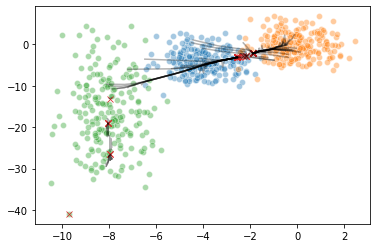

In [121]:
sns.scatterplot(a[:,0],a[:,1],alpha=0.4)
sns.scatterplot(b[:,0],b[:,1],alpha=0.4)
sns.scatterplot(c[:,0],c[:,1],alpha=0.4)
trajectories = np.array(MS._trajectories)
for i in range(trajectories.shape[1]):
    traj = trajectories[:,i,:].reshape((trajectories.shape[0],trajectories.shape[2]))
    sns.lineplot(traj[:,0],traj[:,1], color='k',alpha=0.3)
sns.scatterplot(ccs[:,0],ccs[:,1],marker='x')

# todo
1. Hyper-parameter sweep (Change lambda and see what happens
2. Implement a Gaussian Kernel
3. Implement Blurring
4. Install VSCode so we can go for a live share :)